First include the necessary modules:

In [2]:
import os
os.getcwd()

'/home/csbotos/af_challenge_itk/python_experiments'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data:

In [2]:
label_dict = {
    'N':0,
    'A':1,
    'O':2,
    '~':3
}

#load data - Ihave saved the data which was generated by Csaba's scrip into numpy objects
data=np.load('Data.npy')
label=np.load('Label.npy')

divide the data into groups based on their labels:

In [3]:
ind = np.where(label == label_dict['N'] )[0]
num_normal=len(ind)
normal_samples=data[ind]

ind = np.where(label == label_dict['A'] )[0]
num_fibrillation=len(ind)
fibrillation_samples=data[ind]

ind = np.where(label == label_dict['O'] )[0]
num_other=len(ind)
other_samples=data[ind]


ind = np.where(label == label_dict['~'] )[0]
num_noisy=len(ind)
noisy_samples=data[ind]

print('Number of normal samples: '+str(num_normal))
print('Number of fibrillation samples: '+str(num_fibrillation))
print('Number of other samples: '+str(num_other))
print('Number of noisy samples: '+str(num_noisy))

Number of normal samples: 5154
Number of fibrillation samples: 771
Number of other samples: 2557
Number of noisy samples: 46


Calculate the spectrum of the different types

In [5]:
spectrum_length=200
#calculate normal spectrum
normal_spectrum=np.zeros((num_normal,spectrum_length),np.complex_)
for ind,d in enumerate(normal_samples):
    f=np.fft.fft(d)
    normal_spectrum[ind]=f[:spectrum_length]

#calculate af spectrum
fibrillation_spectrum=np.zeros((num_fibrillation,spectrum_length),np.complex)
for ind,d in enumerate(fibrillation_samples):
    f=np.fft.fft(d)
    fibrillation_spectrum[ind]=f[:spectrum_length]

#calculate magnitude
normal_mag_spectrum=np.absolute(normal_spectrum)
fibrillation_mag_spectrum=np.absolute(fibrillation_spectrum)

#calculte average spectrum
normal_avg_spectrum=np.mean(normal_mag_spectrum,0)
fibrillation_avg_spectrum=np.mean(fibrillation_mag_spectrum,0)

Display the spectra

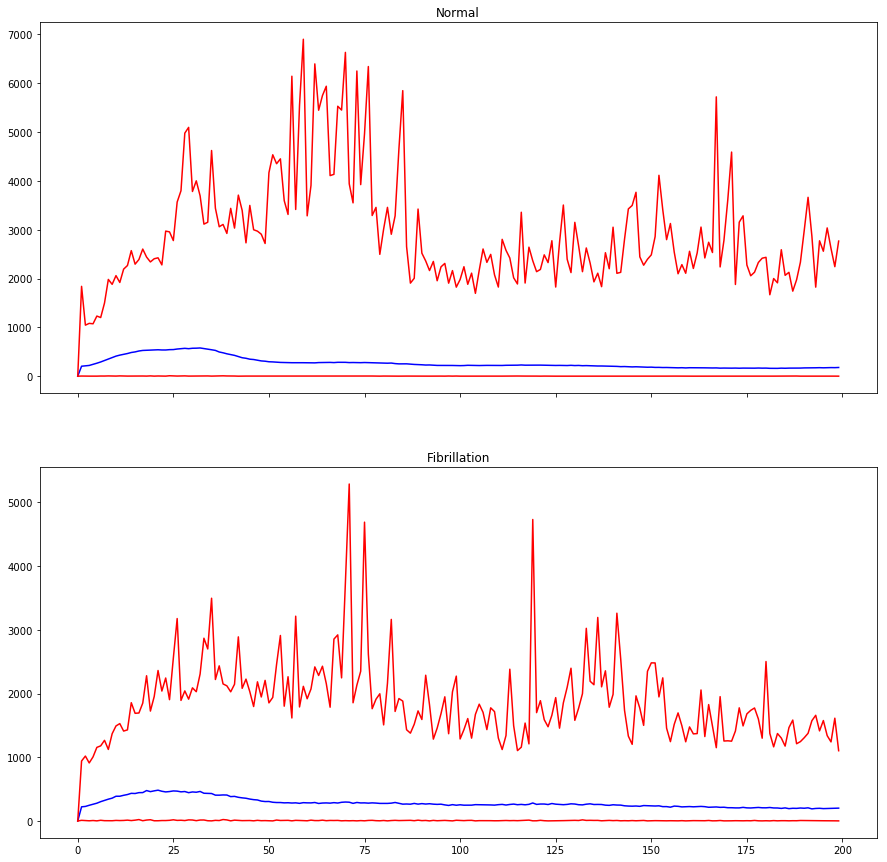

In [10]:
fig, ax = plt.subplots(2, sharex=True,figsize=(15,15))
plt.errorbar(x, y, e, linestyle='None', marker='^')
ax[0].plot(range(spectrum_length),normal_avg_spectrum,'b', range(spectrum_length), np.min(normal_mag_spectrum,0), 'r', range(spectrum_length), np.max(normal_mag_spectrum,0),'r' )
ax[1].plot(range(spectrum_length),fibrillation_avg_spectrum,'b', range(spectrum_length), np.min(fibrillation_mag_spectrum,0), 'r', range(spectrum_length), np.max(fibrillation_mag_spectrum,0),'r' )
ax[0].set_title('Normal')
ax[1].set_title('Fibrillation')
plt.show()

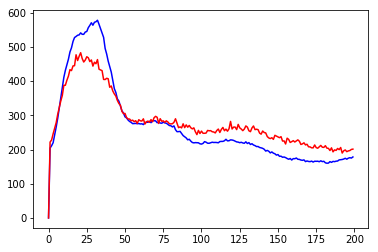

In [11]:
plt.plot(range(spectrum_length),normal_avg_spectrum,'b', range(spectrum_length),fibrillation_avg_spectrum,'r', )
plt.show()

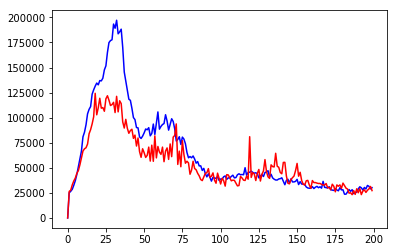

In [13]:
plt.plot(range(spectrum_length),np.var(normal_mag_spectrum,0),'b', range(spectrum_length),np.var(fibrillation_mag_spectrum,0),'r', )
plt.show()